Работа 4. Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

Задание 1. Загрузка исходного датасета. Разделение на обучающую и тестовую выборки. Визуализация изображений из датасета. Нормализация данных.

In [5]:
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os

1.1 Загрузка обработанных изображений с диска

In [6]:
data = []
labels = []

with open('/content/drive/MyDrive/DeepLearning/pickle/64x64_images.pickle','rb') as f:
  data = pickle.load(f)
with open('/content/drive/MyDrive/DeepLearning/pickle/64x64_labels.pickle','rb') as f:
  labels = pickle.load(f)

print(len(data))
print(len(labels))

3000
3000


1.2 Разбивка на обучающую выборку и выборку валидации

In [7]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.1, random_state=42)

1.3 Нормализация данных

In [8]:
X_train = np.array(X_train)/255.0
X_test = np.array(X_test)/255.0

X_train = np.reshape(X_train, (2700, 64, 64, 3))
X_test = np.reshape(X_test, (300, 64, 64, 3))

1.4 Классификация данных

In [9]:
from keras.utils import to_categorical

classes = {'apple': 0, 'banana': 1, 'orange': 2}

y_train = np.array([classes[i] for i in Y_train])
y_test = np.array([classes[i] for i in Y_test])
Y_train = to_categorical(y_train, 3)
Y_test = to_categorical(y_test, 3)

print('Train: X = ', X_train.shape)
print('Test: X = ', X_test.shape)
print('Train: y = ', Y_train.shape)
print('Test: y = ', Y_test.shape)

Train: X =  (2700, 64, 64, 3)
Test: X =  (300, 64, 64, 3)
Train: y =  (2700, 3)
Test: y =  (300, 3)


Задание 2. Создание модели сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout().

2.1 Создание архитектуры нейронной сети

In [10]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras

model_1 = keras.Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(3,  activation='softmax')
])

2.2 Компиляция модели

In [11]:
from keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)

model_1.compile(optimizer=opt,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

2.3 Обучение нейронной сети

In [12]:
history_1 = model_1.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.15, verbose=False)

Задание 3. Создние модели сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization().

3.1 Создание архитектуры нейронной сети

In [13]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow import keras

model_2 = keras.Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(3,  activation='softmax')
])

3.2 Компиляция модели

In [14]:
opt = Adam(learning_rate=0.00001)

model_2.compile(optimizer=opt,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

3.3 Обучение нейронной сети

In [15]:
history_2 = model_2.fit(X_train, Y_train, batch_size=128, epochs=100, validation_split=0.15, verbose=False)

Задание 4. Создание модели сверточной нейронной сети для решения поставленной задачи с использованием Dropout().

4.1 Создание архитектуры нейронной сети

In [16]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow import keras

model_3 = keras.Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3,  activation='softmax')
])

4.2 Компиляция модели

In [17]:
opt = Adam(learning_rate=0.00001)

model_3.compile(optimizer=opt,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

4.3 Обучение нейронной сети

In [18]:
history_3 = model_3.fit(X_train, Y_train, batch_size=180, epochs=150, validation_split=0.2, verbose=False)

Задание 5. Создание модели сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

5.1 Создание архитектуры нейронной сети

In [19]:
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow import keras

model_4 = keras.Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(3,  activation='softmax')
])

5.2 Компиляция модели

In [20]:
opt = Adam(learning_rate=0.0001)

model_4.compile(optimizer=opt,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

5.3 Обучение нейронной сети

In [21]:
history_4 = model_4.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2, verbose=False)

Задание 6. Построение графиков обучения для каждой модели. Выводы по каждому. Подведение итога и выделение наиболее удачной модели

6.1 Создание функции оценки критерия качества работы нейронной сети представлением на графике

In [28]:
def graph(model, history, name):
  model.evaluate(X_test, Y_test)
  plt.style.use("ggplot")
  plt.figure()
  plt.plot( history.history["loss"], label="train_loss")
  plt.plot( history.history["val_loss"], label="val_loss")
  plt.plot( history.history["accuracy"], label="train_accuracy")
  plt.plot( history.history["val_accuracy"], label="val_accuracy")
  plt.title(f"{name}")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

6.2 Оценка критерия качества работы нейронной сети model_1

10/10 [==============================] - 0s 5ms/step - loss: 0.0518 - accuracy: 0.9800


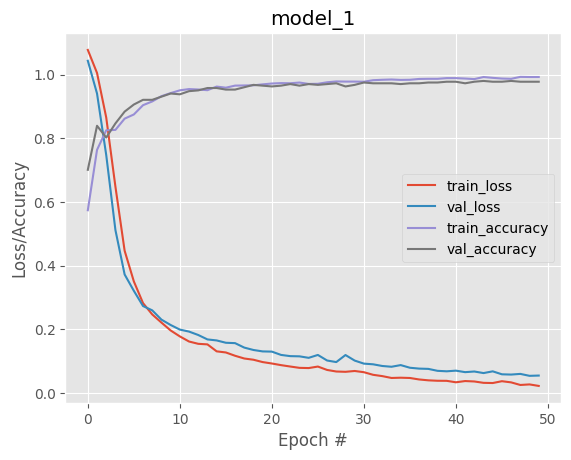

In [29]:
graph(model_1, history_1, 'model_1')

6.3 Оценка критерия качества работы нейронной сети model_2

10/10 [==============================] - 0s 8ms/step - loss: 0.0646 - accuracy: 0.9700


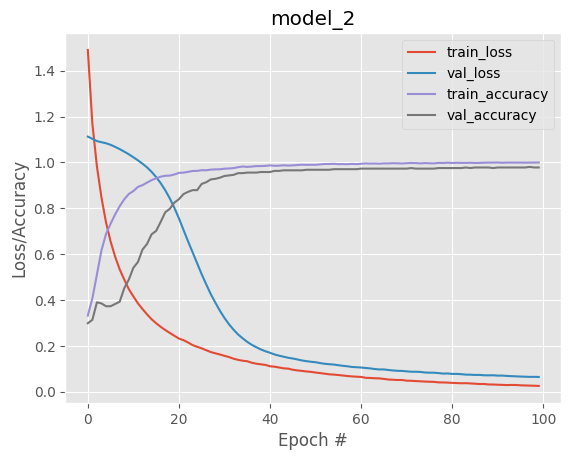

In [30]:
graph(model_2, history_2, 'model_2')

6.4 Оценка критерия качества работы нейронной сети model_3

10/10 [==============================] - 0s 13ms/step - loss: 0.1134 - accuracy: 0.9600


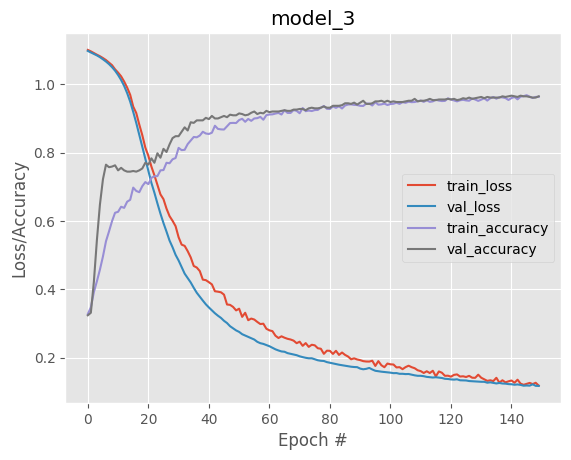

In [31]:
graph(model_3, history_3, 'model_3')

6.5 Оценка критерия качества работы нейронной сети model_4

10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 1.0000


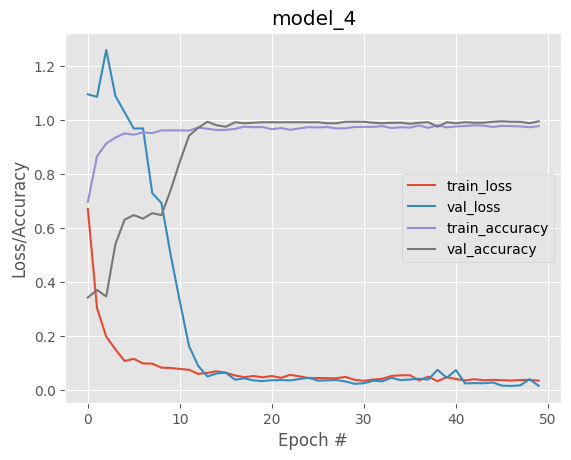

In [32]:
graph(model_4, history_4, 'model_4')

6.6 Оценка критерия качества работы нейронных сетей на тестовой выборке

In [33]:
predictions = model_1.predict(X_test, batch_size=32)
print('model_1')
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1)), '\n\n')

predictions = model_2.predict(X_test, batch_size=32)
print('model_2')
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1)), '\n\n')

predictions = model_3.predict(X_test, batch_size=32)
print('model_3')
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1)), '\n\n')

predictions = model_4.predict(X_test, batch_size=32)
print('model_4')
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1)), '\n\n')

10/10 [==============================] - 0s 4ms/step
model_1
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.98      0.99      0.99       100
           2       0.98      0.96      0.97        93

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300
 


10/10 [==============================] - 0s 4ms/step
model_2
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.97      0.98      0.98       100
           2       0.98      0.96      0.97        93

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300
 


10/10 [==============================] - 0s 4ms/step
model_3
              precision    recall  f1-score   sup

6.7 Вывод